In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('human_activity/features.txt',sep='\s+')

,1,tBodyAcc-mean()-X
0,2,tBodyAcc-mean()-Y
1,3,tBodyAcc-mean()-Z
2,4,tBodyAcc-std()-X
3,5,tBodyAcc-std()-Y
4,6,tBodyAcc-std()-Z
...,...,...
555,557,"angle(tBodyGyroMean,gravityMean)"
556,558,"angle(tBodyGyroJerkMean,gravityMean)"
557,559,"angle(X,gravityMean)"
558,560,"angle(Y,gravityMean)"


In [3]:
pd.read_csv('human_activity/features.txt',
            sep='\s+',
            header=None,
            names=['column_index','column_name'])

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [4]:
feature_name_df = pd.read_csv('human_activity/features.txt',
                                sep='\s+',
                                header=None,
                                names=['column_index','column_name'])

In [5]:
feature_name_df.head(2)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y


In [6]:
feature_name_df.iloc[:,1].values.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [7]:
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [8]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [9]:
feature_name_df.groupby('column_name').count()

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [10]:
feature_dup_df = feature_name_df.groupby('column_name').count()

In [11]:
feature_dup_df[feature_dup_df['column_index']>1].count()

column_index    42
dtype: int64

In [12]:
def get_new_df(old_df):
    new_df = pd.DataFrame(data=old_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    return new_df

In [13]:
get_new_df(feature_name_df)

,dup_cnt
0,0
1,0
2,0
3,0
4,0
...,...
556,0
557,0
558,0
559,0


In [14]:
df = get_new_df(feature_name_df)

In [15]:
df[df['dup_cnt']>0]

,dup_cnt
316,1
317,1
318,1
319,1
320,1
...,...
497,2
498,2
499,2
500,2


In [16]:
def get_new_df(old_df):
    dup_df = pd.DataFrame(data=old_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    new_df = dup_df.reset_index()
    return new_df

In [17]:
df = get_new_df(feature_name_df)
df

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
556,556,0
557,557,0
558,558,0
559,559,0


In [18]:
def get_new_df(old_df):
    dup_df = pd.DataFrame(data=old_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    dup_df = dup_df.reset_index()
    new_df = pd.merge(old_df.reset_index(),dup_df)
    
    return new_df

In [19]:
df = get_new_df(feature_name_df)
df

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [20]:
def get_new_df(old_df):
    dup_df = pd.DataFrame(data=old_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    dup_df = dup_df.reset_index()
    new_df = pd.merge(old_df.reset_index(),dup_df,how='outer')
    new_df['column_name'] = new_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0],axis=1)
    new_df.drop(columns=['index'],inplace=True)
    
    return new_df

In [21]:
df = get_new_df(feature_name_df)
df

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [22]:
df[df['dup_cnt']>0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [23]:
def get_human_dataset():
    feature_name_df = pd.read_csv('human_activity/features.txt',
                                sep='\s+',
                                header=None,
                                names=['column_index','column_name'])
    name_df = get_new_df(feature_name_df)
    feature_name = name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    y_train = pd.read_csv('human_activity/train/y_train.txt',sep='\s+',names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt',sep='\s+',names=['action'])
    return X_train,X_test,y_train,y_test

In [24]:
X_train,X_test,y_train,y_test = get_human_dataset()

In [25]:
X_train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [27]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test,pred)

0.8547675602307431

In [30]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {
    'max_depth': [6,8,10,12,16,20,24],
    'min_samples_split': [16],
}

grid_cv = GridSearchCV(dt_clf,params,scoring='accuracy',cv=5,verbose=1)

In [33]:
%%time
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Wall time: 1min 6s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [16]},
             scoring='accuracy', verbose=1)

In [34]:
grid_cv.best_score_

0.8548794147162603

In [35]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [36]:
cv_result = pd.DataFrame(grid_cv.cv_results_)

In [37]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.198689,0.030454,0.005280,0.000692,6,16,"{'max_depth': 6, 'min_samples_split': 16}",0.813732,0.868117,0.819728,0.866667,0.870068,0.847662,0.025350,5
1,1.495218,0.041385,0.005207,0.000875,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.806254,0.830048,0.860544,0.874830,0.902721,0.854879,0.033764,1
2,1.734049,0.070149,0.004999,0.000122,10,16,"{'max_depth': 10, 'min_samples_split': 16}",0.804895,0.816451,0.866667,0.884354,0.891156,0.852705,0.035427,2
3,1.936855,0.098239,0.004345,0.000399,12,16,"{'max_depth': 12, 'min_samples_split': 16}",0.798097,0.810333,0.851020,0.884354,0.885034,0.845768,0.036295,7
4,2.142756,0.157106,0.004955,0.000388,16,16,"{'max_depth': 16, 'min_samples_split': 16}",0.800816,0.815092,0.858503,0.876871,0.884354,0.847127,0.033379,6
5,2.210699,0.196661,0.005452,0.000922,20,16,"{'max_depth': 20, 'min_samples_split': 16}",0.798097,0.815092,0.858503,0.876871,0.894558,0.848624,0.036559,3
6,2.231004,0.198891,0.004594,0.000562,24,16,"{'max_depth': 24, 'min_samples_split': 16}",0.798097,0.815092,0.858503,0.876871,0.894558,0.848624,0.036559,3


In [38]:
cv_result[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [39]:
max_depth = [6,8,10,12,16,20,24]
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth,min_samples_split=16,random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print(f'max_depth:{depth} 정확도:{accuracy:.4f}')

max_depth:6 정확도:0.8551
max_depth:8 정확도:0.8717
max_depth:10 정확도:0.8599
max_depth:12 정확도:0.8571
max_depth:16 정확도:0.8599
max_depth:20 정확도:0.8565
max_depth:24 정확도:0.8565


In [40]:
%%time
params = {
    'max_depth': [8,12,16,20],
    'min_samples_split': [16,24],
}

grid_cv = GridSearchCV(dt_clf,params,scoring='accuracy',cv=5,verbose=1)

grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 1min 20s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24,
                                              min_samples_split=16,
                                              random_state=156),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [41]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [42]:
grid_cv.best_score_

0.8548794147162603

In [43]:
%%time
params = {
    'max_depth': [8],
    'min_samples_split': [8,12,16,20,24],
}

grid_cv = GridSearchCV(dt_clf,params,scoring='accuracy',cv=5,verbose=1)

grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 39 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24,
                                              min_samples_split=16,
                                              random_state=156),
             param_grid={'max_depth': [8],
                         'min_samples_split': [8, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [44]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [45]:
grid_cv.best_score_

0.8548794147162603

In [46]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,pred)

0.8717339667458432

In [47]:
grid_cv.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

In [48]:
pd.Series(grid_cv.best_estimator_.feature_importances_)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.001752
         ...   
556    0.001291
557    0.000000
558    0.000989
559    0.139001
560    0.002987
Length: 561, dtype: float64

In [49]:
data = pd.Series(grid_cv.best_estimator_.feature_importances_,index=X_train.columns)

In [50]:
data.sort_values(ascending=False)

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
                                     ...   
tBodyGyroJerk-correlation()-Y,Z    0.000000
tBodyGyroJerk-correlation()-X,Z    0.000000
tBodyGyroJerk-correlation()-X,Y    0.000000
tBodyGyroJerk-arCoeff()-Z,3        0.000000
fBodyAcc-sma()                     0.000000
Length: 561, dtype: float64

In [51]:
top10 = data.sort_values(ascending=False)[:10]

In [52]:
import seaborn as sns

<AxesSubplot:>

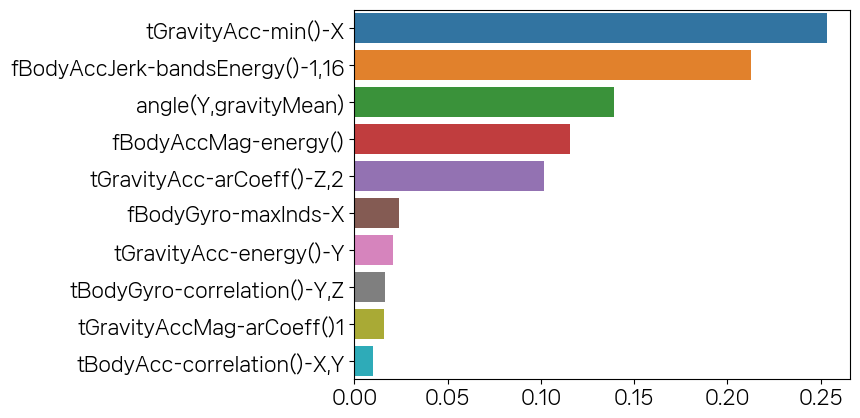

In [53]:
sns.barplot(x=top10,y=top10.index)